## LIME Test 2 Control Data Classification

In [1]:
# Import Libraries
import numpy as np

from sklearn.model_selection import train_test_split

from project_utils.control_data  import Control_Data
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Class_Feature_Statistics


In [2]:
active_features  = ["Active_1", "Active_2", "Active_3", "Active_4", "Active_5"]
passive_features = ["Passive_1", "Passive_2", "Passive_3", "Passive_4", "Passive_5"]
all_features     = active_features + passive_features

In [3]:
data = Control_Data(Y_std_dev=0.1,
                    Y_Func='Classification',
                    Active_X=active_features,
                    Passive_X=passive_features,
                    Num_Samples=500,
                    feature_bounds=[[0,2],[1,2],[2,3],[0,5],[8,10],\
                                    [0,2],[0,4],[0,5],[0,8],[0,10]])


In [4]:
# Splitting X & y into training and testing set
X = data.Get_Features()
y = data.Get_Outcomes()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

print('Train Test Shapes:', X_train.shape, X_test.shape)


Train Test Shapes: (400, 10) (100, 10)


In [5]:
#Train and Test a Random Forest with the data
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(n_estimators=100, criterion='log_loss')
RF_Model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss')

In [6]:
#Train and Test a Linear Classifier with the data
from sklearn.linear_model import LogisticRegression

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

LogisticRegression()

In [7]:
#Train and Test a Dummy Classifier with the data
#from sklearn.dummy import DummyClassifier 
#Dumb_Model = DummyClassifier (strategy = 'uniform')
#Dumb_Model.fit(X_train, y_train)

In [8]:
print('Model Score Random Forest', RF_Model.score(X_test, y_test))
print('Model Score Linear Reg.  ', LR_Model.score(X_test, y_test))
#print('Model Score Dummy        ', Dumb_Model.score(X_test, y_test))

Model Score Random Forest 0.88
Model Score Linear Reg.   0.9


In [9]:
print('RF Feature Importances:  ', RF_Model.feature_importances_)
print('LR Feature Coefficients: ', LR_Model.coef_)
print('LR Feature No.Features:  ', LR_Model.n_features_in_)
#print('Dumb Output Classes:     ', Dumb_Model.classes_)
#print('Dumb Class Prior:        ', Dumb_Model.class_prior_)

RF Feature Importances:   [0.14672834 0.15377155 0.15552001 0.15560956 0.17714593 0.04308475
 0.0393165  0.0432944  0.0450615  0.04046746]
LR Feature Coefficients:  [[ 2.66590833  4.11614651  4.36648501  1.12119964  2.88240906 -0.10928076
   0.09418623 -0.02279024 -0.09130347 -0.01205459]]
LR Feature No.Features:   10


In [10]:
# LIME Explanation for Training Data
from lime import lime_tabular

RF_LIME = lime_tabular.LimeTabularExplainer(training_data=X_train,
                                            mode="classification",
                                            #training_labels=None,
                                            feature_names=data.Get_Feature_Names(),
                                            #categorical_features=None,
                                            #categorical_names=None,
                                            #kernel_width=None,
                                            #kernel=None,
                                            verbose=False,
                                            class_names=data.Get_Class_Names(),
                                            #feature_selection='auto',
                                            discretize_continuous=False,
                                            #discretizer='quartile',
                                            sample_around_instance=True)
                                            #random_state=None,
                                            #training_data_stats=None)


In [11]:
# Generate explantion data for Random Foreall_featuresst

RF_Stats = Feature_Statistics(all_features, classes=['Zero', 'One'])

Zero_Stats = Class_Feature_Statistics('Zero', all_features, classes=['Zero', 'One'])
One_Stats  = Class_Feature_Statistics('One',  all_features, classes=['Zero', 'One'])

for test_instance in range(X_test.shape[0]):

    data_row  = X_test[test_instance,:]
    
    RF_explain_inst = RF_LIME.explain_instance(data_row=data_row,
                                               predict_fn=RF_Model.predict_proba,
                                               #labels=None,
                                               #top_labels=None,
                                               #num_features=10,
                                               num_samples=100,
                                               #distance_metric='euclidean',
                                               #model_regressor=None,
                                               sampling_method='gaussian')
    
    y_predict = RF_Model.predict_proba(data_row.reshape(1, -1))

    print('INSTANCE: ', test_instance)
    
    RF_Stats.Add_LIME_Sample(sample     = RF_explain_inst.as_list(),
                             outcome    = y_test[test_instance],
                             prediction = y_predict)
    
    Zero_Stats.Add_LIME_Sample(sample     = RF_explain_inst.as_list(),
                               outcome    = y_test[test_instance],
                               prediction = y_predict)
    
    One_Stats.Add_LIME_Sample(sample     = RF_explain_inst.as_list(),
                              outcome    = y_test[test_instance],
                              prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56
INSTANCE:  57
INSTANCE:  58
INSTANCE:  59
INSTANCE:  60
INSTANCE:  61
INSTANCE:  62
INSTANCE:  63
INSTANCE:  64
INSTANCE:  65
INSTANCE:  66
INSTANCE:  67
INSTANCE:  68
INSTANCE:  69
INSTANCE:  70
INSTANCE:  71
IN

In [12]:
print(RF_explain_inst.as_list())

print(y_predict)

[('Active_5', 0.11255882717867975), ('Active_2', 0.11226709917421257), ('Active_3', 0.10392204586504723), ('Active_1', 0.06121362505612385), ('Active_4', 0.06020177994653778), ('Passive_2', 0.034654204035926665), ('Passive_5', -0.015551375991950094), ('Passive_1', 0.005505143856949963), ('Passive_4', 0.0019145749115417306), ('Passive_3', 0.0013275904082155352)]
[[0.4 0.6]]


In [13]:
RF_explain_inst.show_in_notebook()

In [14]:
RF_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

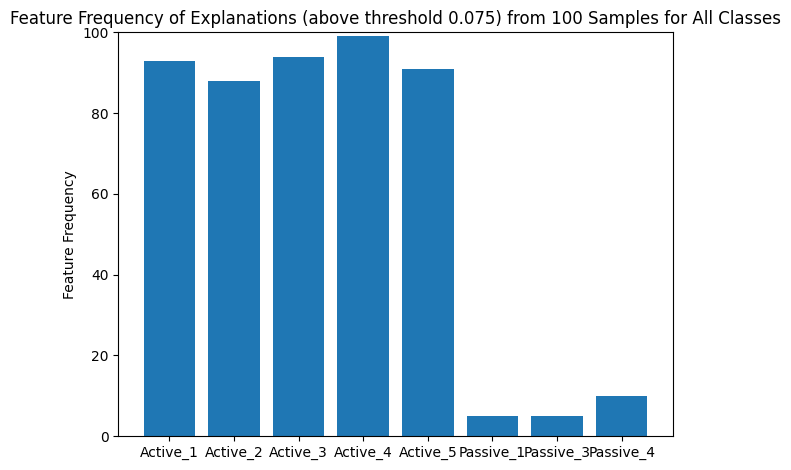

In [15]:
RF_Stats.Frequency_Plot()

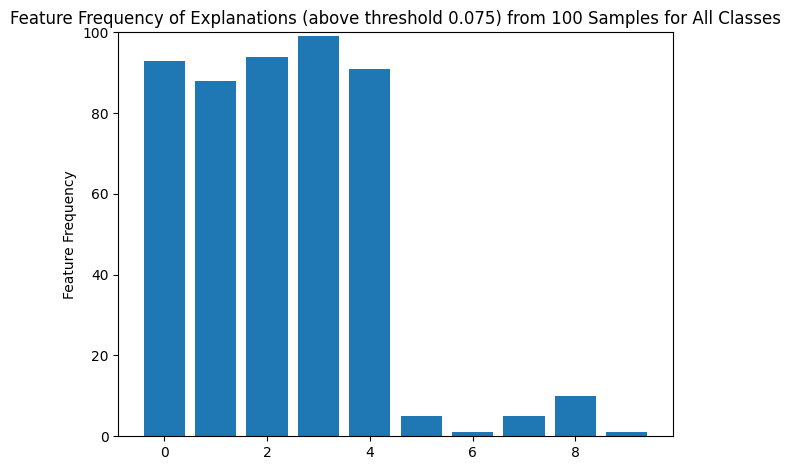

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [16]:
RF_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

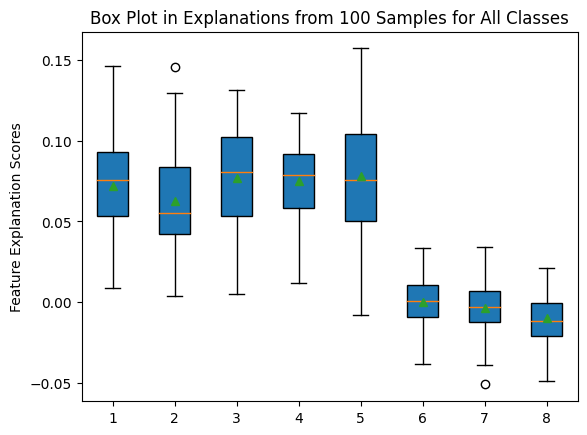

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_3
8 -      Passive_4


In [17]:
RF_Stats.Box_Plot()

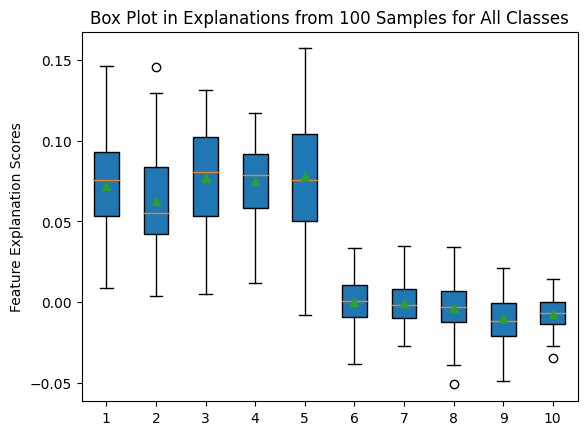

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [18]:
RF_Stats.Box_Plot(top_features=False)

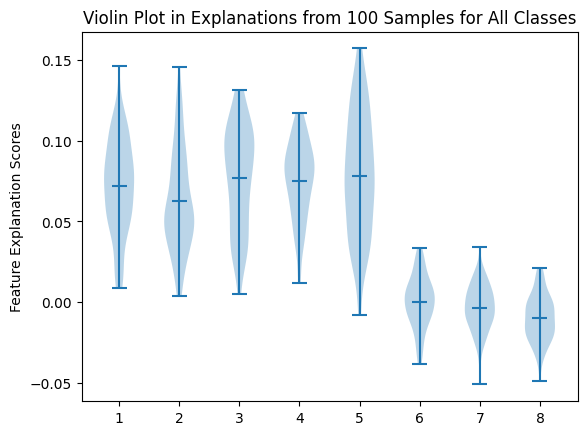

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_3
8 -      Passive_4


In [19]:
RF_Stats.Violin_Plot()

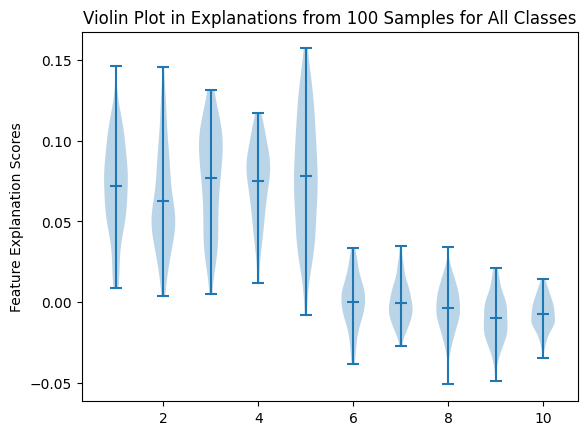

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [20]:
RF_Stats.Violin_Plot(top_features=False)

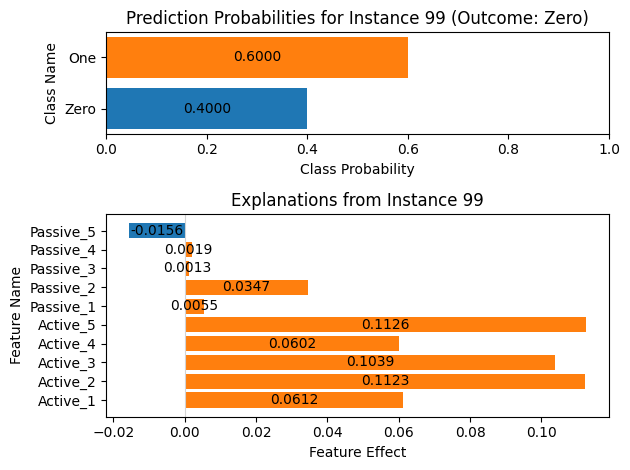

In [21]:
RF_Stats.View_Explanation(instance=last_instance)

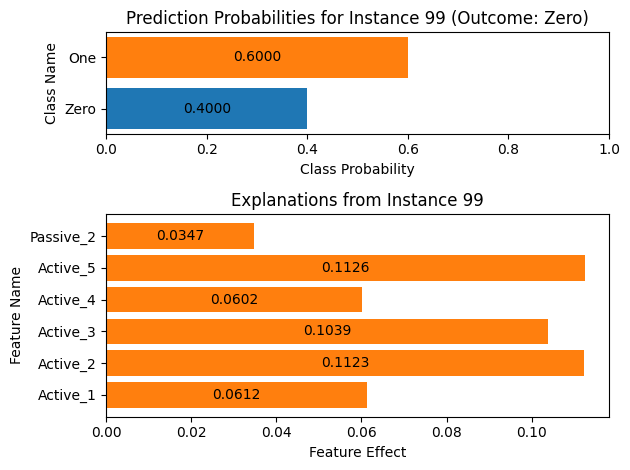

In [22]:
RF_Stats.View_Explanation(instance=last_instance, max_features=6)

In [23]:
Zero_Stats.Feature_Counts(max_features=11, scaled=True, threshold=0.075)

In [24]:
One_Stats.Feature_Counts(max_features=11, scaled=True, threshold=0.075)

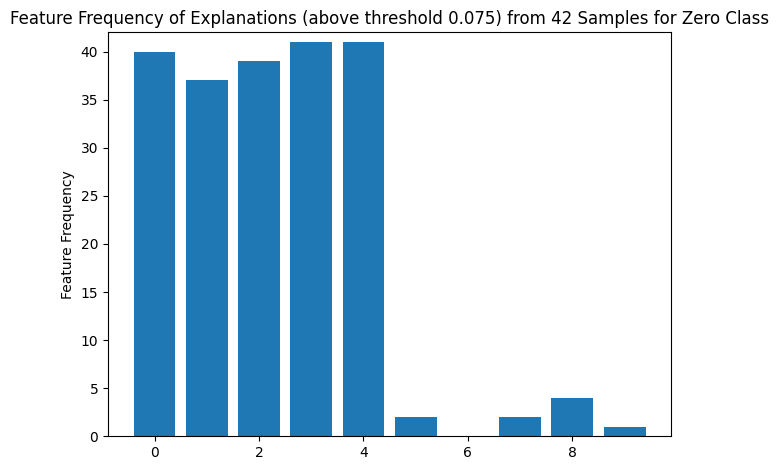

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [25]:
Zero_Stats.Frequency_Plot(display_feature_list=True)

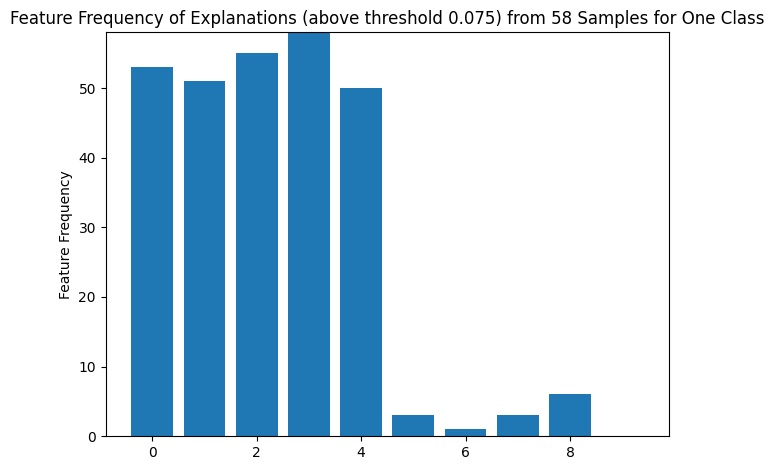

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [26]:
One_Stats.Frequency_Plot(display_feature_list=True)

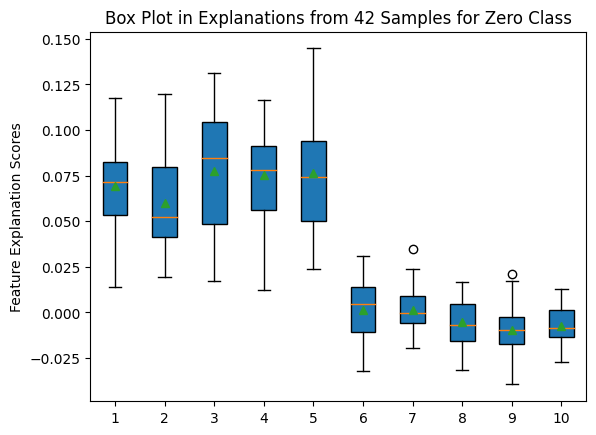

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [27]:
Zero_Stats.Box_Plot()

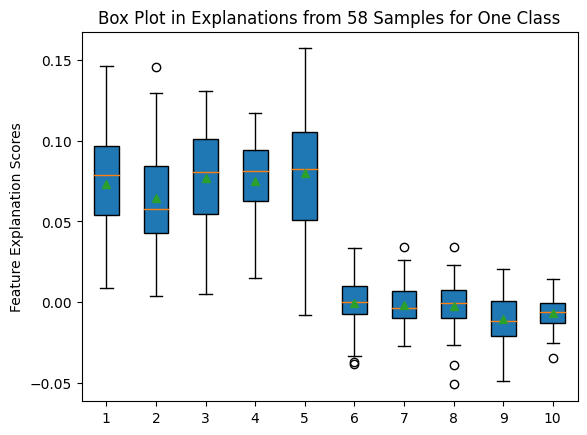

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [28]:
One_Stats.Box_Plot()